In [1]:
# Load the data
data <- read.table("./data 9.1/uscrime.txt", header = TRUE)

In [2]:
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [3]:
uscrime_prc <- prcomp(data[,-16], center=TRUE, scale=TRUE)

summary(uscrime_prc)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

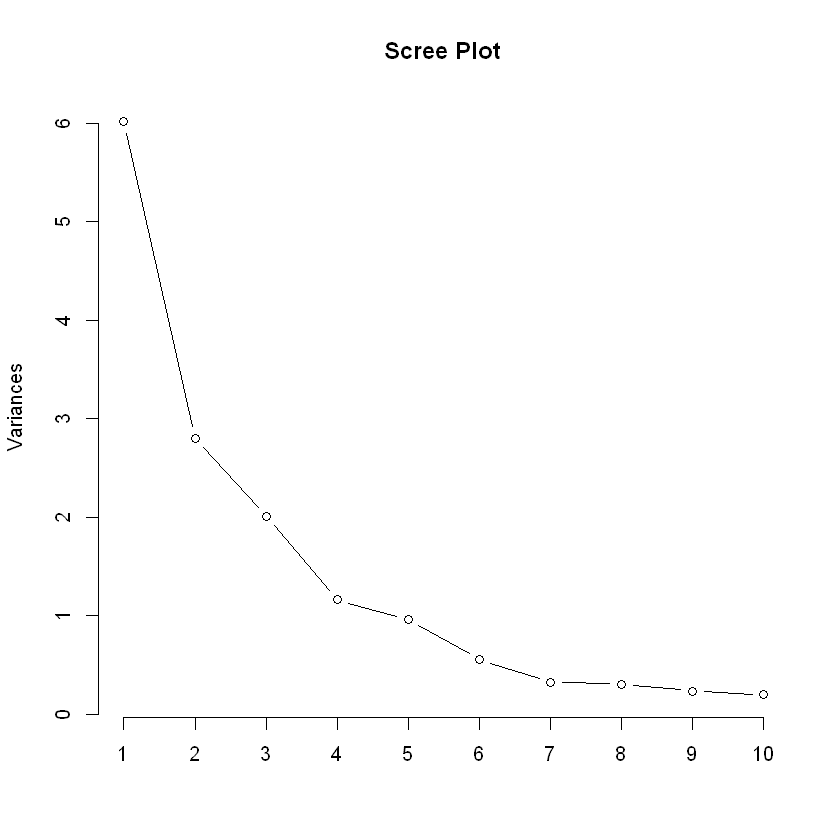

In [4]:
screeplot(uscrime_prc, main = "Scree Plot", type = "line")

#### Based on the scree plot, we can choose the first five Pc’s in our model because they’re all above the STD

In [5]:
#Test PC = 5 
pc=5
uscrime_matrix <- cbind(uscrime_prc$x[,1:pc],data[,16])
#LR model
uscrime_model <- lm(V6~., data = as.data.frame(uscrime_matrix))

summary(uscrime_model)


Call:
lm(formula = V6 ~ ., data = as.data.frame(uscrime_matrix))

Residuals:
    Min      1Q  Median      3Q     Max 
-420.79 -185.01   12.21  146.24  447.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.59  25.428  < 2e-16 ***
PC1            65.22      14.67   4.447 6.51e-05 ***
PC2           -70.08      21.49  -3.261  0.00224 ** 
PC3            25.19      25.41   0.992  0.32725    
PC4            69.45      33.37   2.081  0.04374 *  
PC5          -229.04      36.75  -6.232 2.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 244 on 41 degrees of freedom
Multiple R-squared:  0.6452,	Adjusted R-squared:  0.6019 
F-statistic: 14.91 on 5 and 41 DF,  p-value: 2.446e-08


#### Based on the summary R-squared = 0.6452 and Adjusted R-squared = 0.6019 


In [6]:
new_city <- data.frame(M= 14.0, So = 0, Ed = 10.0, Po1 = 12.0, Po2 = 15.5,
                    LF = 0.640, M.F = 94.0, Pop = 150, NW = 1.1, U1 = 0.120, 
                    U2 = 3.6, Wealth = 3200, Ineq = 20.1, Prob = 0.040, 
                    Time = 39.0)

pred_newcity <- data.frame(predict(uscrime_prc, new_city)) 

pred_newcity_model <- predict(uscrime_model, pred_newcity)

pred_newcity_model

1 
1388.926

#### Comparison
#### This R square value is slightly lower than the previous one, suggesting that the model might not explain as much of the variance in the response variable as the previous model. Additionally, the interpretation of the coefficients may be more complex due to the inclusion of principal components. Overall we’ve shown that a PCA model can give just about the same accuracy when observing less predictors.